In [8]:
'''
good resources
scanpy workflow:
https://nbisweden.github.io/workshop-scRNAseq/exercises.html
seurat question on DE analysis between conditions:
https://github.com/satijalab/seurat/issues/2820
'''

import os, tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import scanpy as sc
import anndata as ad
rc('font', size=14)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)
# rc('text', usetex=True)

In [9]:
data_location = 'local'
data_location = 'server'

if data_location=='server':
    folder = os.path.join("Y:",os.sep,"Nicola_Gritti","analysis_code","scRNAseq_Gastruloids","new_codes",'results','integration','diff_expr')
elif data_location=='hdd':
    folder = os.path.join("F:",os.sep,"scrnaseq_gastruloids",'results','integration','diff_expr')
elif data_location == 'local':
    folder = os.path.join('C:',os.sep,'Users','nicol','OneDrive','Desktop','scrnaseq_gastruloids','results','integration','diff_expr')


In [10]:
adata_pluri = ad.read_csv(os.path.join(folder,'expression_markersDiff_epi_pluri.csv')).T
pluri_fate = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_pluri_obsMeta.csv'))
pluri_fate = pluri_fate.rename(columns={'celltype.general': 'celltype'})
pluri_fate = pluri_fate[['celltype','dataset']]
adata_pluri.obs = pluri_fate
pluri_genes = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_pluri_varMeta.csv'))
pluri_genes = pluri_genes.rename(columns={'Unnamed: 0': 'geneName'})
pluri_genes = pluri_genes[['geneName','avg_logFC','pijuan','anlas']]
pluri_genes.index = pluri_genes.geneName
adata_pluri.var = pluri_genes

adata_primed = ad.read_csv(os.path.join(folder,'expression_markersDiff_epi_primed.csv')).T
primed_fate = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_primed_obsMeta.csv'))
primed_fate = primed_fate.rename(columns={'celltype.general': 'celltype'})
primed_fate = primed_fate[['celltype','dataset']]
adata_primed.obs = primed_fate
primed_genes = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_primed_varMeta.csv'))
primed_genes = primed_genes.rename(columns={'Unnamed: 0': 'geneName'})
primed_genes = primed_genes[['geneName','avg_logFC','pijuan','anlas']]
primed_genes.index = primed_genes.geneName
adata_primed.var = primed_genes

adata_ediff = ad.read_csv(os.path.join(folder,'expression_markersDiff_epi_ediff.csv')).T
ediff_fate = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_ediff_obsMeta.csv'))
ediff_fate = ediff_fate.rename(columns={'celltype.general': 'celltype'})
ediff_fate = ediff_fate[['celltype','dataset']]
adata_ediff.obs = ediff_fate
ediff_genes = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_ediff_varMeta.csv'))
ediff_genes = ediff_genes.rename(columns={'Unnamed: 0': 'geneName'})
ediff_genes = ediff_genes[['geneName','avg_logFC','pijuan','anlas']]
ediff_genes.index = ediff_genes.geneName
adata_ediff.var = ediff_genes


# Epiblast vs Pluripotent

In [39]:
# 10 highest and lowest
epihigh = adata_pluri.var.nlargest(10,'avg_logFC').index
epilow = adata_pluri.var.nsmallest(10,'avg_logFC').index
adata1 = adata_pluri[:,epihigh]
adata2 = adata_pluri[:,epilow]

In [40]:
###
# Epi high pluri low

vals = adata1.X
genes = list(adata1.var.geneName.values)
celltypes = list(adata1.obs.celltype.values)

exp = []
gene = []
celltype = []
for i in tqdm.tqdm(range(len(genes))):
    for j in range(len(celltypes)):
        exp.append(vals[j,i])
        gene.append(genes[i])
        celltype.append(celltypes[j])
        
df1 = pd.DataFrame({'exp':exp,'gene':gene,'celltype':celltype})

ct = df1.celltype
newct = []
for c in ct:
    if c=='Epiblast':
        newct.append('Mouse Epiblast')
    else:
        newct.append('Gastr. Pluripotent')
df1.celltype = newct

###
# Epi low pluri high

vals = adata2.X
genes = list(adata2.var.geneName.values)
celltypes = list(adata2.obs.celltype.values)

exp = []
gene = []
celltype = []
for i in tqdm.tqdm(range(len(genes))):
    for j in range(len(celltypes)):
        exp.append(vals[j,i])
        gene.append(genes[i])
        celltype.append(celltypes[j])
        
df2 = pd.DataFrame({'exp':exp,'gene':gene,'celltype':celltype})

ct = df2.celltype
newct = []
for c in ct:
    if c=='Epiblast':
        newct.append('Mouse Epiblast')
    else:
        newct.append('Gastr. Pluripotent')
df2.celltype = newct


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.91it/s]


In [41]:
gene_order1 = list(adata1.var.geneName.values)
logfc1 = list(adata1.var.avg_logFC.values)
gene_order1 = [y for x,y in sorted(zip(logfc1,gene_order1))]
gene_order1 = gene_order1[::-1]

gene_order2 = list(adata2.var.geneName.values)
logfc2 = list(adata2.var.avg_logFC.values)
gene_order2 = [y for x,y in sorted(zip(logfc2,gene_order2))]
# gene_order2 = gene_order1[::-1]

# print(gene_order1)
# print(gene_order2)

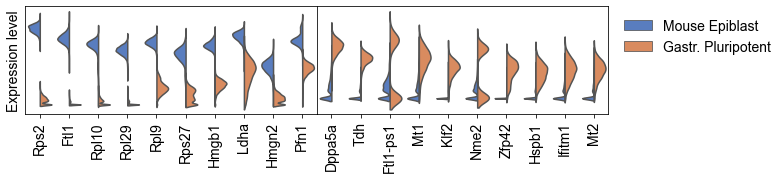

In [42]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,2))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15, wspace=0)

sns.violinplot(x="gene", y="exp", hue="celltype", order=gene_order1,
                    data=df1, palette="muted", split=True, ax=ax[0], scale='width',inner=None)
ticklabels = ax[0].get_xticklabels()
ax[0].set_xticklabels(ticklabels,rotation=90,ha='center')
ax[0].get_legend().set_visible(False)
ax[0].set_ylabel('Expression level')

sns.violinplot(x="gene", y="exp", hue="celltype", order=gene_order2,
                    data=df2, palette="muted", split=True, ax=ax[1], scale='width', inner=None)
ticklabels = ax[1].get_xticklabels()
ax[1].set_xticklabels(ticklabels,rotation=90,ha='center')
ax[1].legend(frameon=False,bbox_to_anchor=(1.6,1.))
ax[1].set_ylabel('')

for a in ax:
#     a.set_ylim(0,6)
    a.set_xlabel('')
    a.set_yticks([])
    
fig.savefig(os.path.join(folder,'diffexp_epi_vs_pluri.pdf'))

# Epiblast vs. Primed Pluripotent

In [43]:
# 10 highest and lowest
epihigh = adata_primed.var.nlargest(10,'avg_logFC').index
epilow = adata_primed.var.nsmallest(10,'avg_logFC').index
adata1 = adata_primed[:,epihigh]
adata2 = adata_primed[:,epilow]

In [44]:
###
# Epi high pluri low

vals = adata1.X
genes = list(adata1.var.geneName.values)
celltypes = list(adata2.obs.celltype.values)

exp = []
gene = []
celltype = []
for i in tqdm.tqdm(range(len(genes))):
    for j in range(len(celltypes)):
        exp.append(vals[j,i])
        gene.append(genes[i])
        celltype.append(celltypes[j])
        
df1 = pd.DataFrame({'exp':exp,'gene':gene,'celltype':celltype})

ct = df1.celltype
newct = []
for c in ct:
    if c=='Epiblast':
        newct.append('Mouse Epiblast')
    else:
        newct.append('Gastr. Primed pluripotent')
df1.celltype = newct

###
# Epi low pluri high

vals = adata2.X
genes = list(adata2.var.geneName.values)
celltypes = list(adata2.obs.celltype.values)

exp = []
gene = []
celltype = []
for i in tqdm.tqdm(range(len(genes))):
    for j in range(len(celltypes)):
        exp.append(vals[j,i])
        gene.append(genes[i])
        celltype.append(celltypes[j])
        
df2 = pd.DataFrame({'exp':exp,'gene':gene,'celltype':celltype})

ct = df2.celltype
newct = []
for c in ct:
    if c=='Epiblast':
        newct.append('Mouse Epiblast')
    else:
        newct.append('Gastr. Primed pluripotent')
df2.celltype = newct


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 98.04it/s]


In [45]:
gene_order1 = list(adata1.var.geneName.values)
logfc1 = list(adata1.var.avg_logFC.values)
gene_order1 = [y for x,y in sorted(zip(logfc1,gene_order1))]
gene_order1 = gene_order1[::-1]

gene_order2 = list(adata2.var.geneName.values)
logfc2 = list(adata2.var.avg_logFC.values)
gene_order2 = [y for x,y in sorted(zip(logfc2,gene_order2))]
# gene_order2 = gene_order1[::-1]

# print(gene_order1)
# print(gene_order2)

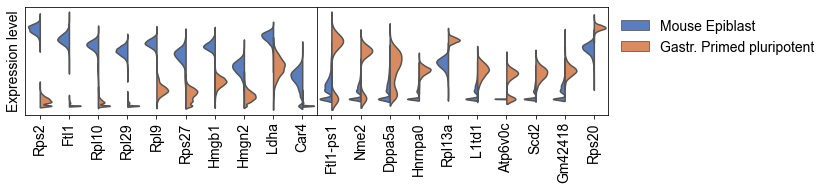

In [46]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,2))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15, wspace=0)

sns.violinplot(x="gene", y="exp", hue="celltype", order=gene_order1,
                    data=df1, palette="muted", split=True, ax=ax[0], scale='width',inner=None)
ticklabels = ax[0].get_xticklabels()
ax[0].set_xticklabels(ticklabels,rotation=90,ha='center')
ax[0].get_legend().set_visible(False)
ax[0].set_ylabel('Expression level')

sns.violinplot(x="gene", y="exp", hue="celltype", order=gene_order2,
                    data=df2, palette="muted", split=True, ax=ax[1], scale='width', inner=None)
ticklabels = ax[1].get_xticklabels()
ax[1].set_xticklabels(ticklabels,rotation=90,ha='center')
ax[1].legend(frameon=False,bbox_to_anchor=(1.75,1.))
ax[1].set_ylabel('')

for a in ax:
#     a.set_ylim(0,6)
    a.set_xlabel('')
    a.set_yticks([])
    
fig.savefig(os.path.join(folder,'diffexp_epi_vs_primed.pdf'))

# Epiblast vs. Early diff

In [47]:
# 10 highest and lowest
epihigh = adata_ediff.var.nlargest(10,'avg_logFC').index
epilow = adata_ediff.var.nsmallest(10,'avg_logFC').index
adata1 = adata_ediff[:,epihigh]
adata2 = adata_ediff[:,epilow]

In [48]:
###
# Epi high pluri low

vals = adata1.X
genes = list(adata1.var.geneName.values)
celltypes = list(adata2.obs.celltype.values)

exp = []
gene = []
celltype = []
for i in tqdm.tqdm(range(len(genes))):
    for j in range(len(celltypes)):
        exp.append(vals[j,i])
        gene.append(genes[i])
        celltype.append(celltypes[j])
        
df1 = pd.DataFrame({'exp':exp,'gene':gene,'celltype':celltype})

ct = df1.celltype
newct = []
for c in ct:
    if c=='Epiblast':
        newct.append('Mouse Epiblast')
    else:
        newct.append('Gastr. Early diff.')
df1.celltype = newct

###
# Epi low pluri high

vals = adata2.X
genes = list(adata2.var.geneName.values)
celltypes = list(adata2.obs.celltype.values)

exp = []
gene = []
celltype = []
for i in tqdm.tqdm(range(len(genes))):
    for j in range(len(celltypes)):
        exp.append(vals[j,i])
        gene.append(genes[i])
        celltype.append(celltypes[j])
        
df2 = pd.DataFrame({'exp':exp,'gene':gene,'celltype':celltype})

ct = df2.celltype
newct = []
for c in ct:
    if c=='Epiblast':
        newct.append('Mouse Epiblast')
    else:
        newct.append('Gastr. Early diff.')
df2.celltype = newct


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 99.01it/s]


In [49]:
gene_order1 = list(adata1.var.geneName.values)
logfc1 = list(adata1.var.avg_logFC.values)
gene_order1 = [y for x,y in sorted(zip(logfc1,gene_order1))]
gene_order1 = gene_order1[::-1]

gene_order2 = list(adata2.var.geneName.values)
logfc2 = list(adata2.var.avg_logFC.values)
gene_order2 = [y for x,y in sorted(zip(logfc2,gene_order2))]
# gene_order2 = gene_order1[::-1]

# print(gene_order1)
# print(gene_order2)

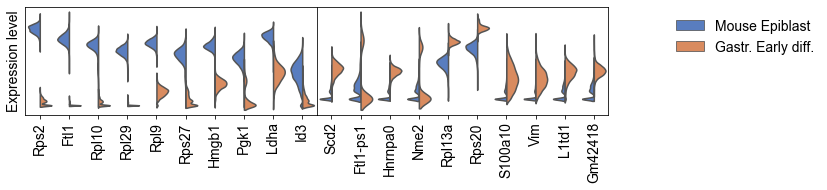

In [50]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,2))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15, wspace=0)

sns.violinplot(x="gene", y="exp", hue="celltype", order=gene_order1,
                    data=df1, palette="muted", split=True, ax=ax[0], scale='width',inner=None)
ticklabels = ax[0].get_xticklabels()
ax[0].set_xticklabels(ticklabels,rotation=90,ha='center')
ax[0].get_legend().set_visible(False)
ax[0].set_ylabel('Expression level')

sns.violinplot(x="gene", y="exp", hue="celltype", order=gene_order2,
                    data=df2, palette="muted", split=True, ax=ax[1], scale='width', inner=None)
ticklabels = ax[1].get_xticklabels()
ax[1].set_xticklabels(ticklabels,rotation=90,ha='center')
ax[1].legend(frameon=False,bbox_to_anchor=(1.75,1.))
ax[1].set_ylabel('')

for a in ax:
#     a.set_ylim(0,6)
    a.set_xlabel('')
    a.set_yticks([])
    
fig.savefig(os.path.join(folder,'diffexp_epi_vs_ediff.pdf'))

C:\Users\gritti\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
C:\Users\gritti\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
C:\Users\gritti\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
C:\Users\gritti\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'cel

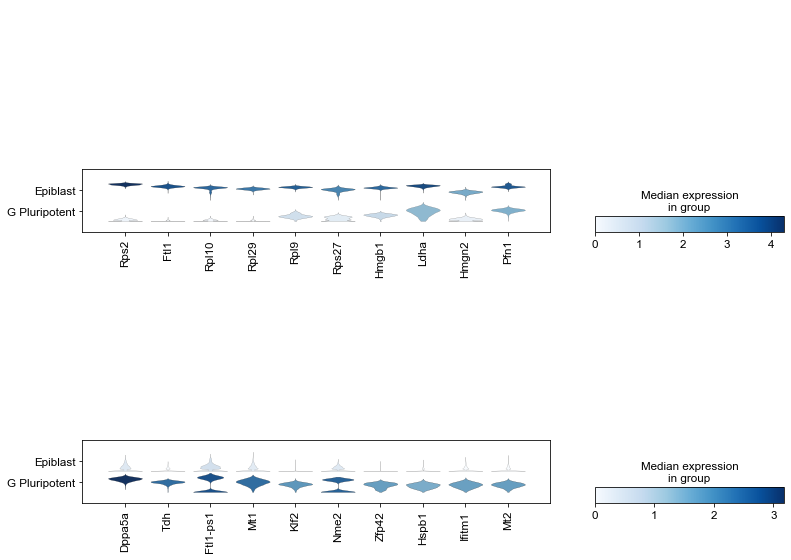

In [6]:
# 10 highest and lowest
epihigh = adata_pluri.var.nlargest(10,'avg_logFC').index
epilow = adata_pluri.var.nsmallest(10,'avg_logFC').index
adata_pluri1 = adata_pluri[:,epihigh]
adata_pluri2 = adata_pluri[:,epilow]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
fig.subplots_adjust(left=0.25,top=0.99, bottom=0.3)
sc.pl.stacked_violin(adata_pluri1, list(adata_pluri1.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Pluripotent'],
                      ax=ax[0],
                      show=False
#                       title='Epiblast vs Pluripotent diff exp',
                    )
# fig.savefig(os.path.join(folder,'diffexp_epiHIGH_vs_pluri.pdf'))

# fig, ax = plt.subplots(figsize=(10,5))
# fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata_pluri2, list(adata_pluri2.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Pluripotent'],
                      ax=ax[1],
#                       title='Epiblast vs Pluripotent diff exp',
                    )
fig.savefig(os.path.join(folder,'diffexp_epi_vs_pluri.pdf'))

C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'celltyp

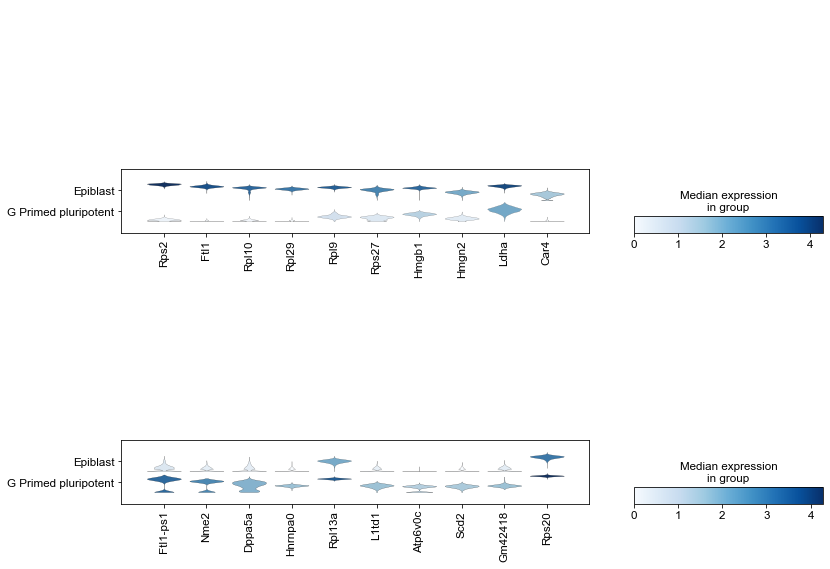

In [7]:
# 10 highest and lowest
epihigh = adata_primed.var.nlargest(10,'avg_logFC').index
epilow = adata_primed.var.nsmallest(10,'avg_logFC').index
adata1 = adata_primed[:,epihigh]
adata2 = adata_primed[:,epilow]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
fig.subplots_adjust(left=0.25,top=0.99, bottom=0.3)
sc.pl.stacked_violin(adata1, list(adata1.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Primed pluripotent'],
                      ax=ax[0],
                     show=False
#                       title='Epiblast vs Pluripotent diff exp',
                    )
# fig.savefig(os.path.join(folder,'diffexp_epiHIGH_vs_pluri.pdf'))

# fig, ax = plt.subplots(figsize=(10,5))
# fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata2, list(adata2.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Primed pluripotent'],
                      ax=ax[1],
#                       title='Epiblast vs Pluripotent diff exp',
                    )
fig.savefig(os.path.join(folder,'diffexp_epi_vs_primed.pdf'))

C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'celltyp

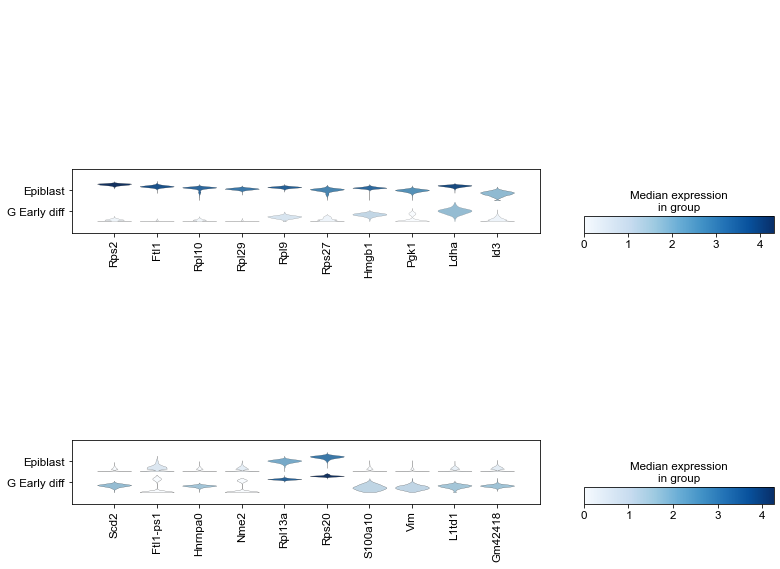

In [8]:
# 10 highest and lowest
epihigh = adata_ediff.var.nlargest(10,'avg_logFC').index
epilow = adata_ediff.var.nsmallest(10,'avg_logFC').index
adata1 = adata_ediff[:,epihigh]
adata2 = adata_ediff[:,epilow]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
fig.subplots_adjust(left=0.25,top=0.99, bottom=0.3)
sc.pl.stacked_violin(adata1, list(adata1.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Early diff'],
                      ax=ax[0],
                     show=False
#                       title='Epiblast vs Pluripotent diff exp',
                    )
# fig.savefig(os.path.join(folder,'diffexp_epiHIGH_vs_pluri.pdf'))

# fig, ax = plt.subplots(figsize=(10,5))
# fig.subplots_adjust(top=0.99)
sc.pl.stacked_violin(adata2, list(adata2.var.index), groupby = 'celltype',
                      categories_order=['Epiblast', 'G Early diff'],
                      ax=ax[1],
#                       title='Epiblast vs Pluripotent diff exp',
                    )
fig.savefig(os.path.join(folder,'diffexp_epi_vs_ediff.pdf'))

# Gene ontology

In [9]:
'''
From:
https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/scanpy/scanpy_05_dge.html
'''

import gseapy
gene_set_names = gseapy.get_library_name(database='Mouse')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'Cancer_Cell_Line_Encyclopedia', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease_Perturbations_from_GEO_up', 'Disease_Signatures_from_GEO_down_2014', 'Disease_Signatures_from_GEO_up_2014', 'DrugMatrix', 'Drug_Perturbations_from_GEO_2014', 'Drug_Perturbations_

In [10]:
thr = 1.

## Pluripotent

In [11]:
enr_res1 = gseapy.enrichr(gene_list=list(adata_pluri[:,adata_pluri.var.avg_logFC>thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epiHIGH_pluri.csv'))

In [12]:
enr_res2 = gseapy.enrichr(gene_list=list(adata_pluri[:,adata_pluri.var.avg_logFC<-thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epi_pluriHIGH.csv'))

In [13]:
gseapy.barplot(enr_res1.res2d,title='EpiblastHigh_vs_PluripotentLow',
              ofname=os.path.join(folder,'GO_epiHigh_vs_PluriLow.pdf'))
gseapy.barplot(enr_res2.res2d,title='EpiblastLow_vs_PluripotentHigh',
              ofname=os.path.join(folder,'GO_epiLow_vs_PluriHigh.pdf'))

## Primed pluripotent

In [14]:
enr_res1 = gseapy.enrichr(gene_list=list(adata_primed[:,adata_primed.var.avg_logFC>thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epiHIGH_primed.csv'))

In [15]:
enr_res2 = gseapy.enrichr(gene_list=list(adata_primed[:,adata_primed.var.avg_logFC<-thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epi_primedHIGH.csv'))

In [16]:
gseapy.barplot(enr_res1.res2d,title='EpiblastHigh_vs_PrimedLow',
              ofname=os.path.join(folder,'GO_epiHigh_vs_PrimedLow.pdf'))
gseapy.barplot(enr_res2.res2d,title='EpiblastLow_vs_PrimedHigh',
              ofname=os.path.join(folder,'GO_epiLow_vs_PrimedHigh.pdf'))


## Early diff

In [17]:
enr_res1 = gseapy.enrichr(gene_list=list(adata_ediff[:,adata_ediff.var.avg_logFC>thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epiHIGH_ediff.csv'))

In [18]:
enr_res2 = gseapy.enrichr(gene_list=list(adata_ediff[:,adata_ediff.var.avg_logFC<-thr].var.index),
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2018',
                     description='pathway',
                     cutoff = 0.5)

# df_res = enr_res.results[enr_res.results['P-value']<1e-5]
# for i in range(len(df_res)):
#     print(df_res.Term[i])
    
# df_res.to_csv(os.path.join(folder,'GO_epi_ediffHIGH.csv'))

In [19]:
gseapy.barplot(enr_res1.res2d,title='EpiblastHigh_vs_EdiffLow',
              ofname=os.path.join(folder,'GO_epiHigh_vs_EdiffLow.pdf'))
gseapy.barplot(enr_res2.res2d,title='EpiblastLow_vs_EdiffHigh',
              ofname=os.path.join(folder,'GO_epiLow_vs_EdiffHigh.pdf'))
